In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
def plot_bars_dodge(
    ax: plt.Axes, x: np.ndarray[int], y_data: pd.DataFrame, space_width=0.3
):
    nbars = y_data.shape[1]
    width = (1 - space_width) / nbars
    for i, col in enumerate(y_data.columns):
        ax.bar(
            x=[x2 - 0.5 + space_width / 2 + width / 2 + width * i for x2 in x],
            height=y_data[col],
            width=width,
            label=col,
        )

In [4]:
def plot_barhs_dodge(
    ax: plt.Axes, y: np.ndarray[int], x_data: pd.DataFrame, space_width=0.3
):
    nbars = x_data.shape[1]
    height = (1 - space_width) / nbars
    for i, col in enumerate(x_data.columns):
        ax.barh(
            y=[y2 - 0.5 + space_width / 2 + height / 2 + height * i for y2 in y],
            width=x_data[col],
            height=height,
            label=col,
        )

### data

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
print(f"{df.shape = }")
print(df.head().to_string())

df.shape = (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [11]:
age_bin = pd.qcut(df["age"], q=10)
gdf = df.groupby(age_bin, dropna=False, observed=False).agg(
    **{
        "n": ("survived", "size"),
        "survival_rate": ("survived", "mean"),
    }
)
gdf['survival_rate_man'] = df.loc[lambda x:x['who'] == 'man'].groupby(age_bin, dropna=False, observed=False)['survived'].mean()
gdf['survival_rate_woman'] = df.loc[lambda x:x['who'] == 'woman'].groupby(age_bin, dropna=False, observed=False)['survived'].mean()
gdf['survival_rate_child'] = df.loc[lambda x:x['who'] == 'child'].groupby(age_bin, dropna=False, observed=False)['survived'].mean()
gdf

,n,survival_rate,survival_rate_man,survival_rate_woman,survival_rate_child
age,,,,,
"(0.419, 14.0]",77,0.584416,NaN,NaN,0.584416
"(14.0, 19.0]",87,0.390805,0.102041,0.781250,0.666667
"(19.0, 22.0]",67,0.283582,0.108696,0.666667,NaN
"(22.0, 25.0]",70,0.371429,0.136364,0.769231,NaN
"(25.0, 28.0]",61,0.393443,0.255814,0.722222,NaN
"(28.0, 31.8]",66,0.393939,0.175000,0.730769,NaN
"(31.8, 36.0]",91,0.483516,0.258065,0.965517,NaN
"(36.0, 41.0]",53,0.358491,0.129032,0.681818,NaN
"(41.0, 50.0]",78,0.397436,0.235294,0.703704,NaN


### plot

In [14]:
# content
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x = np.arange(gdf.shape[0])
plot_bars_dodge(
    ax,
    x=x,
    y_data=gdf.drop(columns=["n"]),
)
x_ticklabels = gdf.index.astype(str)
_ = ax.set_xticks(x, labels=x_ticklabels, rotation=45)
plt.close()

In [25]:
ax.set_xlabel("Age Bin")

ax.set_ylabel("Survival Rate")
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

ax.set_title("Titanic Survival Rate by Age and Gender Groups")
ax.legend(title="Groups", bbox_to_anchor=(0.5, -0.25), loc="upper center", ncol=4)
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

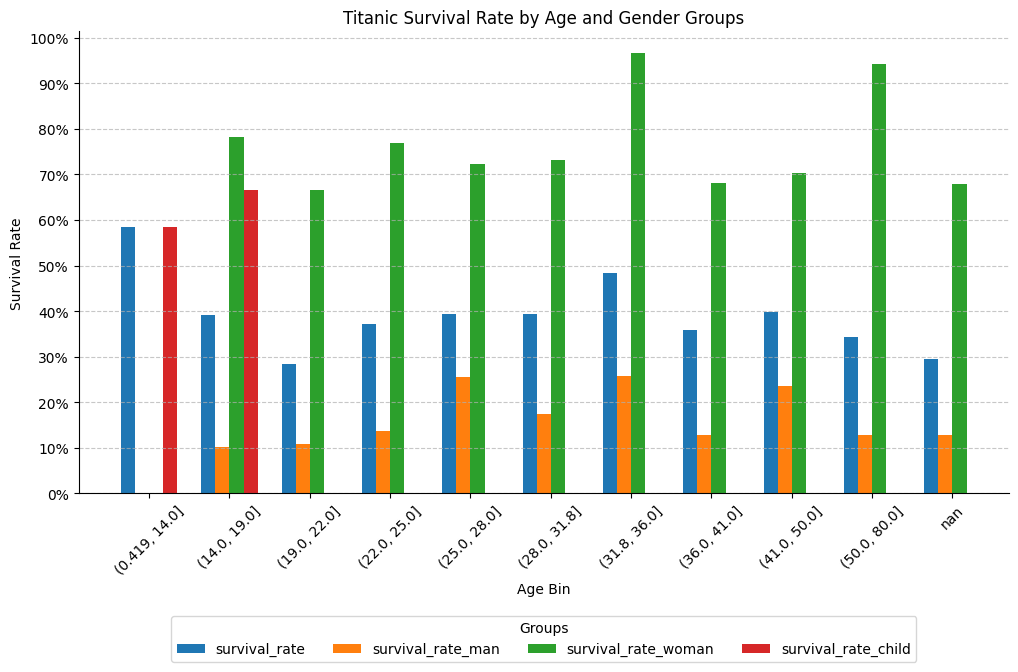

In [26]:
fig